In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Heart Disease dataset
--------------------------------------------

    Features:
    age
    chest pain type (4 values)
    resting blood pressure
    serum cholestoral in mg/dl
    fasting blood sugar > 120 mg/dl
    resting electrocardiographic results (values 0,1,2)
    maximum heart rate achieved
    exercise induced angina
    oldpeak = ST depression induced by exercise relative to rest
    the slope of the peak exercise ST segment
    number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

    target: 0 = no presence of heart disease; 1 = presence of heart disease

source: https://archive.ics.uci.edu/ml/datasets/heart+disease

In [3]:
df = pd.read_csv(os.path.join("..", "Resources", "heart.csv"))
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1


k: 1, Train/Test Score: 1.000/0.711
k: 3, Train/Test Score: 0.894/0.737
k: 5, Train/Test Score: 0.863/0.789
k: 7, Train/Test Score: 0.863/0.789
k: 9, Train/Test Score: 0.859/0.803
k: 11, Train/Test Score: 0.863/0.776
k: 13, Train/Test Score: 0.841/0.763
k: 15, Train/Test Score: 0.846/0.750
k: 17, Train/Test Score: 0.841/0.763
k: 19, Train/Test Score: 0.828/0.763


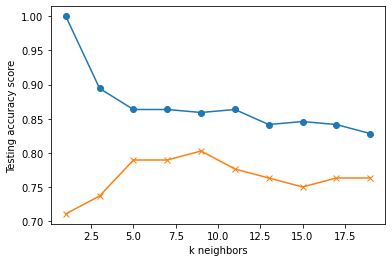

In [4]:
X = df.drop(["target"], axis="columns")
y = df["target"].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale our input data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop through different k values to find which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()


In [5]:
# k = 9 seems to be our best model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.803


In [6]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[24, 11],
       [ 4, 37]])

In [7]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76        35
           1       0.77      0.90      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.80        76
weighted avg       0.81      0.80      0.80        76



In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [9]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

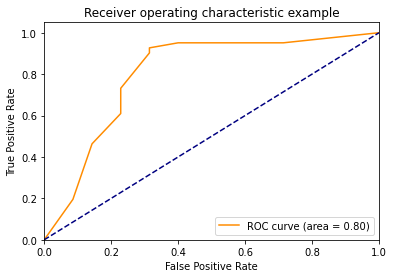

In [10]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()